In the Naive bayes algorithm, we make an assumption that the features are independent of each other. even though this might not be true in many cases, it helps us predict events with a good amount of accuracy.

So in a classification pronblem, we consider the features and predict the class of an event.the assumption her is that the probability that the event is in a class based on one feature is independent of the other features. So to get the total probability of an event, we calculate the probability wrt each feature and then multiply the probabilities. 

Each probability wrt features is calculated using the Bayes theorem and because they are independent, we can embed the whole probability by multiplying each of the probabilities
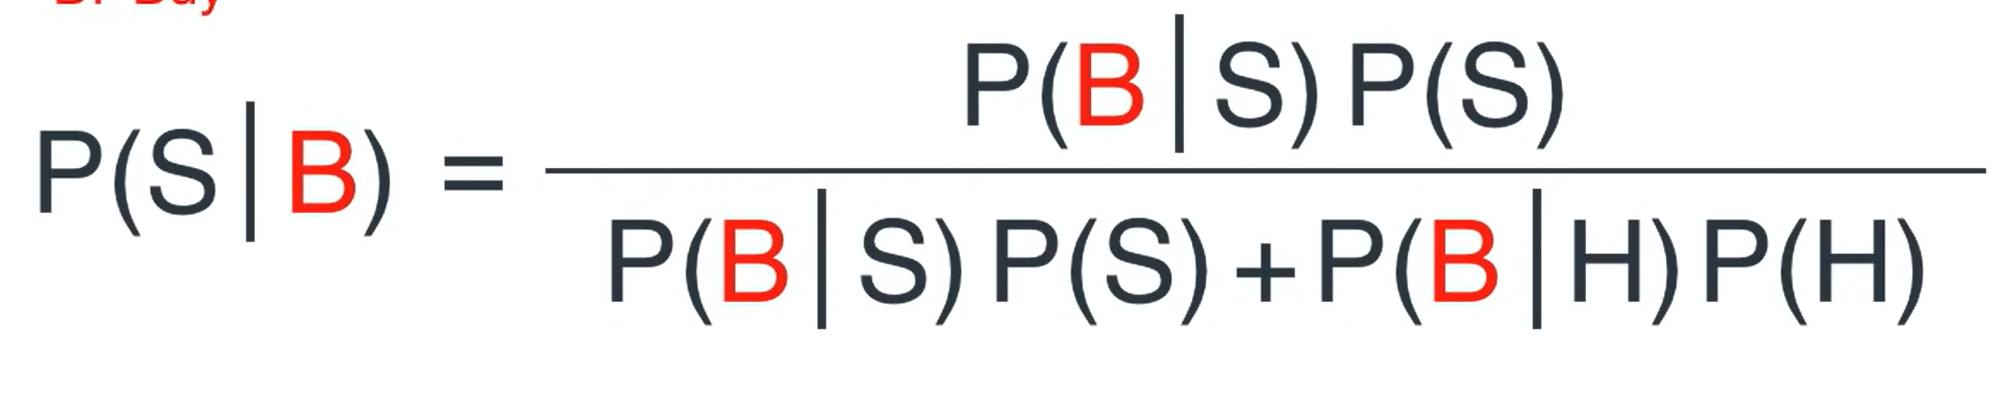
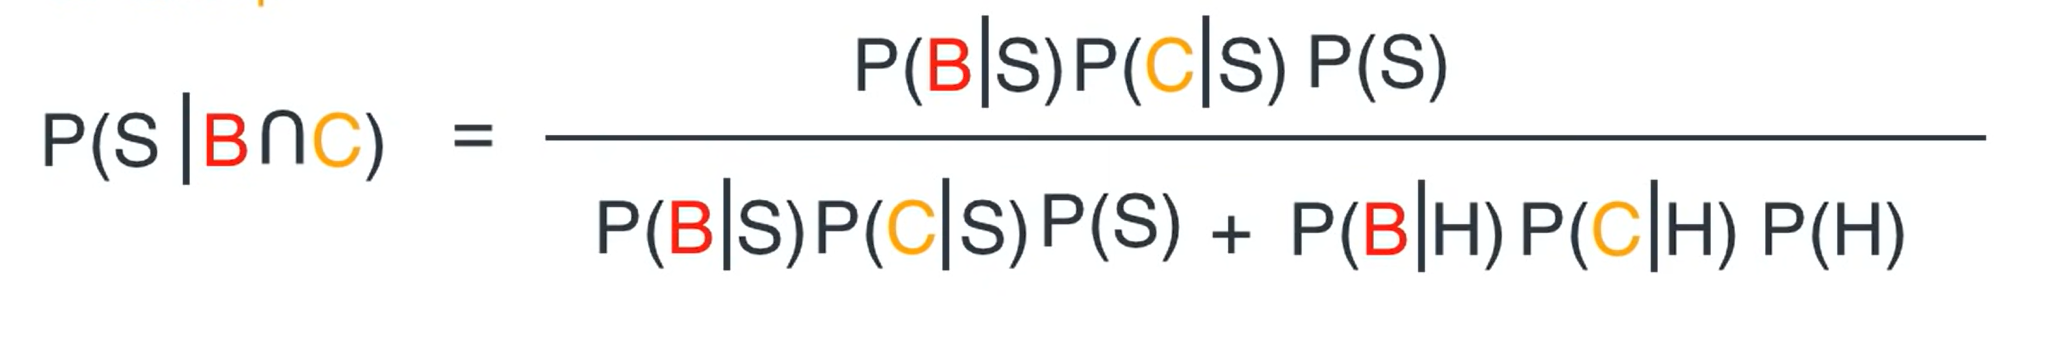

In [15]:
import pandas as pd

In [16]:
df=pd.read_csv('C:\\Users\\Sankalp Mallappa\\Downloads\\titanic\\train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [18]:
df.drop(["PassengerId",'Name','SibSp','Cabin','Parch','Ticket','Embarked'],axis='columns',inplace=True)
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [51]:
target=df.Survived
inputs=df.drop('Survived',axis='columns')

In [52]:
dummies=pd.get_dummies(df.Sex)
dummies

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [53]:
inputs=pd.concat([inputs,dummies],axis='columns')
inputs

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0
3,1,female,35.0,53.1000,1,0
4,3,male,35.0,8.0500,0,1
...,...,...,...,...,...,...
886,2,male,27.0,13.0000,0,1
887,1,female,19.0,30.0000,1,0
888,3,female,NaN,23.4500,1,0
889,1,male,26.0,30.0000,0,1


In [54]:
inputs.drop('Sex',axis='columns',inplace=True)
inputs

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1
...,...,...,...,...,...
886,2,27.0,13.0000,0,1
887,1,19.0,30.0000,1,0
888,3,NaN,23.4500,1,0
889,1,26.0,30.0000,0,1


In [55]:
inputs.columns[inputs.isna().any()]



Index(['Age'], dtype='object')

In [62]:
inputs.Age=inputs.Age.fillna(inputs.Age.median())

In [63]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    28.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(inputs,target,test_size=0.2,random_state=10)
X_train

,Pclass,Age,Fare,female,male
57,3,28.5,7.2292,0,1
717,2,27.0,10.5000,1,0
431,3,28.0,16.1000,1,0
633,1,28.0,0.0000,0,1
163,3,17.0,8.6625,0,1
...,...,...,...,...,...
369,1,24.0,69.3000,1,0
320,3,22.0,7.2500,0,1
527,1,28.0,221.7792,0,1
125,3,12.0,11.2417,0,1


In [78]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [79]:
model.fit(X_train,y_train)

GaussianNB()

In [80]:
model.score(X_test,y_test)

0.8268156424581006